### 一、常见的聚类算法
        与分类不同，聚类分析是在没有给定划分类别的情况下，根据数据相似度进行样本分组的一种方法。聚类的输入是一组未被标记的样本，聚类根据数据自身的聚类或相似度将他们划分为若干组，划分的原则是组内样本最小化而组间（外部）距离最大化。
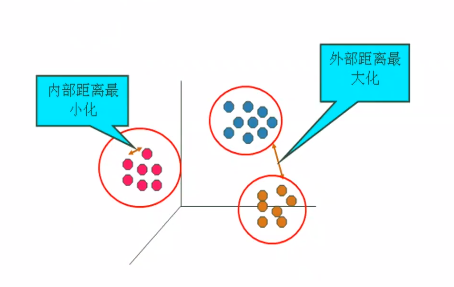

常用聚类算法：    
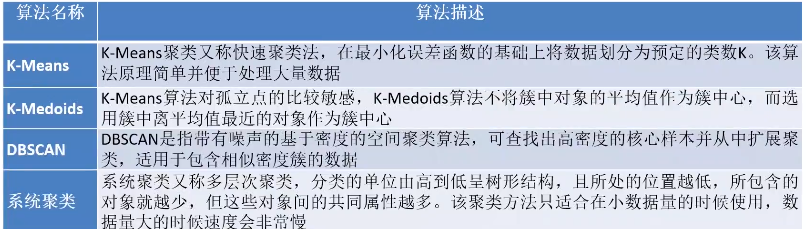

### 二、聚类算法模型评价
        聚类分析仅根据样本数据本身将样本分组，组内的对象相互之间是相似的（相关的），而不同组众的对象是不同的（不相关的）。组内的相似性越大，组件差别越大，聚类效果就越好。
常见评价法有：    
- purity评价法： 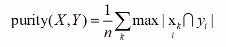
- RI评价法： 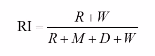
- F值评价法： 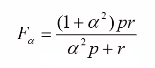
- FM系数： 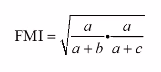
- Rand指数：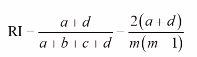
- DB指数：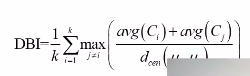

### 三、K-Means聚类
        K-Means算法是典型的基于聚类的非层次聚类算法，在最小化误差函数的基础上将数据划分为预定的类数K，采用距离作为相似性的衡量指标，即认为两个对象的距离越近，相似度就越大。

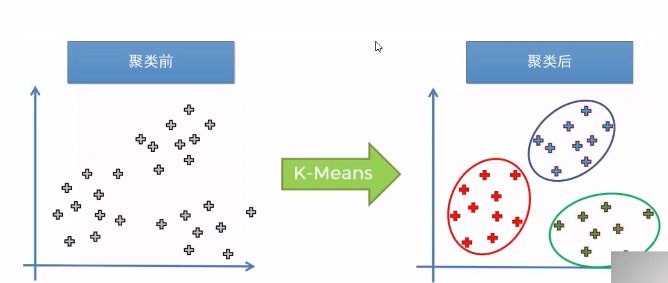

#### 1.相似度度量
- 连续属性：对于连续属性，要先对属性值进行零-均值规范，在进行距离的计算。K-Means聚类算法众，一般需要度量样本之间的距离、样本与簇之间的距离以及簇与簇之间的距离。
    - 欧几里得距离：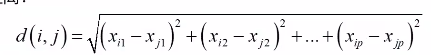
    - 曼哈顿距离：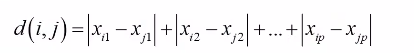
    - 闵可夫斯基距离：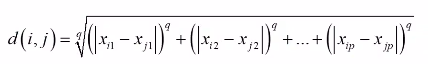

- 文档数据：对于文档数据使用余弦相似性度量，先将文档数据整理成文档一词矩阵格式：
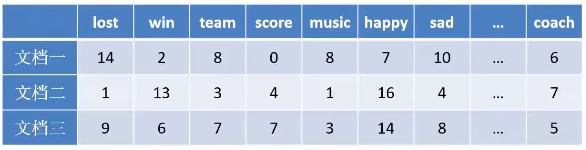
两个文档之间的相似度的计算公式为：
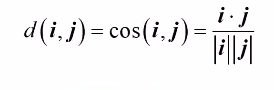




#### 2.算法过程
K均值算法的具体步骤如下：    
（1）从N个样本数据众随机选取K个对象作为初始的聚类中心。    
（2）分别计算每个样本到各个聚类中心的距离，将对象分配到距离最近的聚类众。    
（3）所有对象分配完成后，重新计算K个聚类的中心。    
（4）与前一次计算得到的K个聚类中心比较，如果聚类中心发生变化，转步骤（2），否则转步骤（5）    
（5）当质心不发生变化时停止并输出聚类结果。 

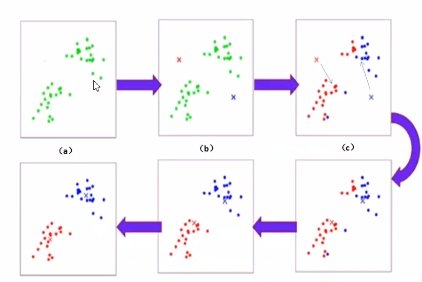

#### 3.目标函数
        使用误差平方和簇内误方差（Sum Squared Error,SSE）作为度量聚类质量的目标函数，对于两种不同的聚类结果，选择误差平方和较小的分类结果。

- 连续属性的SSE计算公式为式：
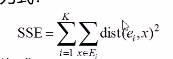
- 文档数据的SSE计算公式为式：
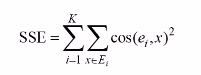
- 簇Ei的聚类中心计算公式为式：
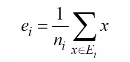


#### 4.具体实现
        使用skikit-learn库中cluster模块的KMeans类可以实现K-Means聚类算法对数据进行聚类，KMeans类的基本使用格式和常用参数说明如下：
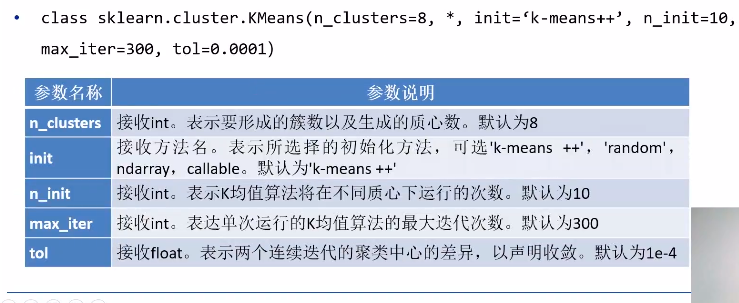

#### 代码

In [5]:
# 1.读取数据
import pandas as pd
data=pd.read_csv('../data/kmeansSamples_test1.txt',sep=' ',header=None,names=['x','y'])
data.head()

,x,y
0,-8.749381,18.463960
1,9.413741,-12.295301
2,4.303722,-11.000898
3,-13.933017,14.173815
4,10.325102,6.074507


In [8]:
# 2.数据标准化
from sklearn.preprocessing import StandardScaler
features_scaler=StandardScaler().fit_transform(data)
features_scaler

array([[-1.14288751,  1.36752559],
       [ 0.98086994, -1.34616607],
       [ 0.38337138, -1.23196923],
       [-1.74899389,  0.98903364],
       [ 1.0874326 ,  0.27448385],
       [-1.35580073,  0.94373695],
       [-1.16454977,  1.04979907],
       [-1.42769869,  0.64111031],
       [ 0.20981042,  0.28171947],
       [ 0.37607098,  0.45181433],
       [ 0.33885979,  0.17071738],
       [ 0.54099291, -0.03123534],
       [ 0.9441173 ,  0.026075  ],
       [-0.73254297,  1.46244182],
       [ 0.36744281,  0.21791023],
       [-1.13611845,  0.95586252],
       [-1.33439877,  0.67460138],
       [-1.43781108,  0.85422885],
       [ 0.41323326,  0.25275756],
       [-0.92966651,  1.1826249 ],
       [ 0.86899107, -0.02809764],
       [ 1.01528069, -1.180861  ],
       [ 0.87622181, -1.02370242],
       [ 0.81744568, -1.47319162],
       [-1.11703544,  0.79694451],
       [ 0.48411986,  0.41102859],
       [ 0.97892299, -1.32080526],
       [-1.54085956,  1.31432363],
       [ 0.85413647,

In [58]:
# 3.构建Kmeans聚类模型
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3,random_state=14).fit(features_scaler)

f:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [59]:
# 查看类的中心点
center=pd.DataFrame(model.cluster_centers_)
# 查看每个类有多少个点
label=pd.Series(model.labels_).value_counts()

# 合并中心点和类别数目
r=pd.concat([center,label],axis=1)
r.columns=['x','y','类别数目']
r

,x,y,类别数目
0,0.823689,-1.261855,101
1,-1.309973,1.085587,100
2,0.482875,0.190794,99


In [60]:
# 4.存储聚类结果
result=pd.concat([data,pd.Series(model.labels_)],axis=1)
result.columns=['x','y','聚类类别']
result

,x,y,聚类类别
0,-8.749381,18.463960,1
1,9.413741,-12.295301,0
2,4.303722,-11.000898,0
3,-13.933017,14.173815,1
4,10.325102,6.074507,2
...,...,...,...
295,5.881828,-11.065889,0
296,9.302471,-13.083299,0
297,8.226077,-10.915361,0
298,4.617305,3.935184,2


In [64]:
# 5.绘制雷达图
from radar_map import plot

<Figure size 1100x1100 with 0 Axes>

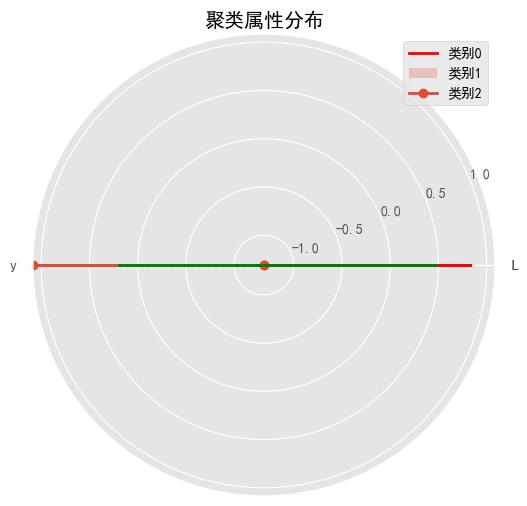

In [65]:
plot(kmeans_model=model,columns=data.columns)

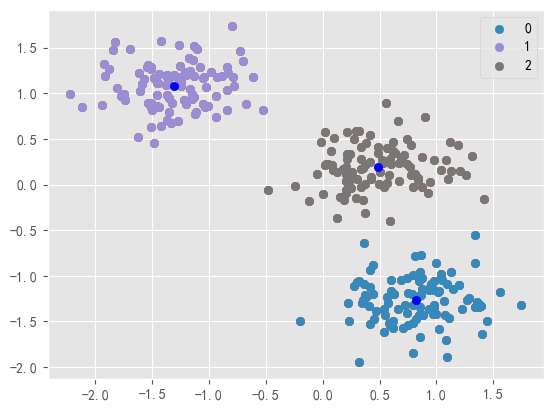

In [91]:
# 散点图
plt.scatter(features_scaler[:,0],features_scaler[:,1])
for i in range(3):
    plt.scatter(features_scaler[model.labels_==i][:,0],features_scaler[model.labels_==i][:,1],label=f'{i}')
    # 画中心点
    plt.scatter(model.cluster_centers_[i][0],model.cluster_centers_[i][1],color='b')
plt.legend()
plt.show()

### 四、密度聚类
        基于密度的聚类算法又称为密度聚类算法。密度聚类算法的基本思想是：以样本点在空间分布上的稠密程度为依据进行聚类，若区域中的样本密度大于某个阙值，则将相应的样本点划入与之相近的簇中。
        具有噪声的基于密度聚类（Density-Based Spatial Clustering of Applications with Nois,DBSCAN）是一种典型的密度聚类算法。该算法从样本密度的角度进行考察样本之间的可联接性，并由可联接样本不断扩展直到获得最终的聚类结果。

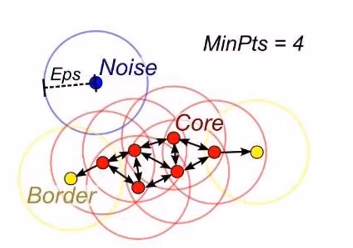
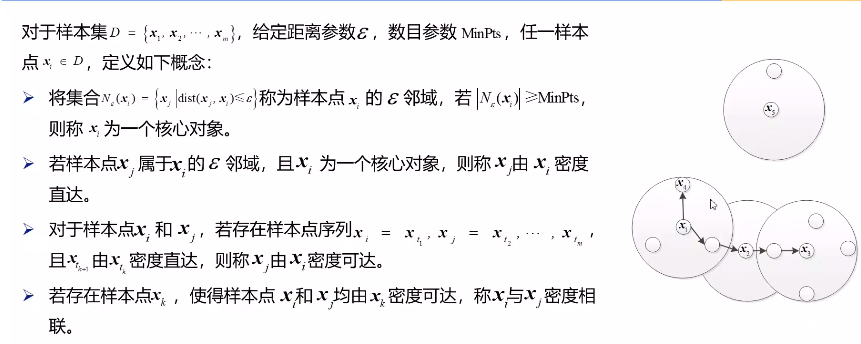

#### 1.DBSCAN算法的基本过程：    
（1）输入样本集合、初始化距离参数，将数目参数MinPts.      
（2）确定核心对象集合。    
（3）在核心对象集合中，随机选择一个核心对象作为种子。    
（4）依据簇划分原则生成一个簇，并更新核心对象集合。    
（5）若核心对象集合为空，则算法结束，否则返回步骤（3）。    
（6）输出聚类结果。    
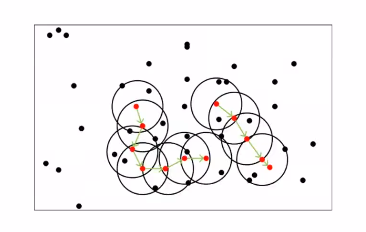

#### 2.具体实现
        使用skikit-learn库中cluster模块的DBSCAN类可以实现DBSCAN聚类算法对数据进行聚类，DBSCAN类的基本使用格式和常用参数说明如下：

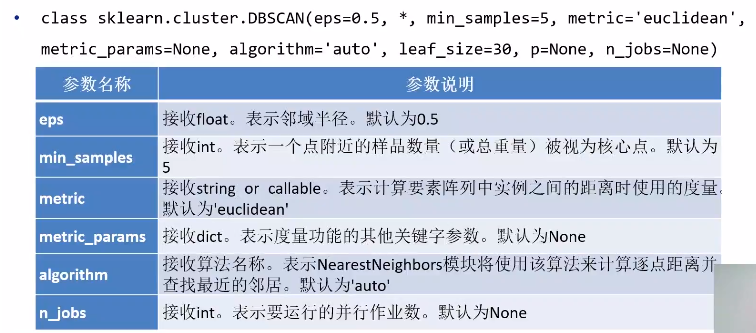

#### 代码

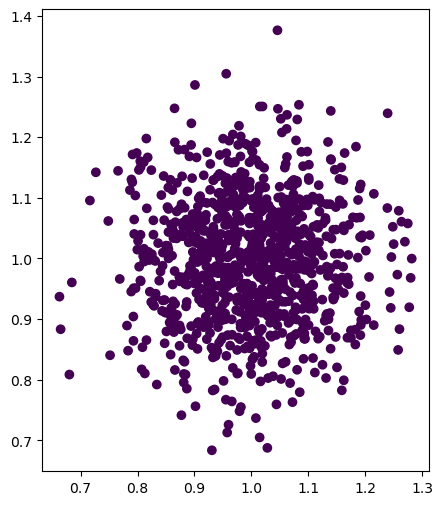

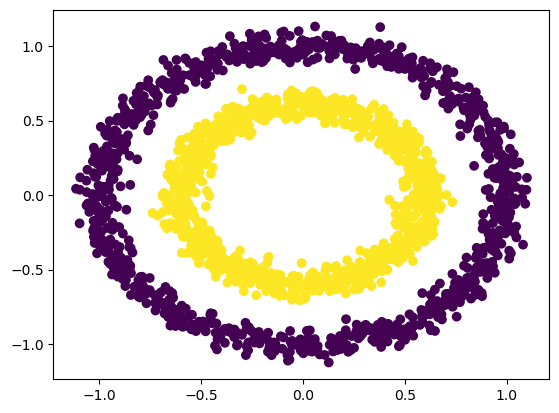

In [18]:
# 1.生成数据
from sklearn.datasets import make_blobs,make_circles
import matplotlib.pyplot as plt

x1,y1=make_blobs(n_samples=1000,n_features=2,centers=[[1,1]],
                cluster_std=[[0.1]],random_state=14)

x2,y2=make_circles(n_samples=2000,factor=0.6,noise=0.05)

# 数据可视化
plt.figure(figsize=(5,6))
plt.scatter(x1[:,0],x1[:,1],c=y1)
plt.show()

plt.scatter(x2[:,0],x2[:,1],c=y2)
plt.show()

In [19]:
import  numpy as np 
x=np.concatenate((x1,x2))# 合并数据
x

array([[ 1.10149206,  0.97908421],
       [ 0.90223068,  1.03612761],
       [ 0.87872183,  0.96887934],
       ...,
       [ 0.9538539 ,  0.37373552],
       [-0.75992185,  0.43315603],
       [ 1.00833104,  0.11661279]])

In [22]:
# 2.构建聚类模型
from sklearn.cluster import DBSCAN
dbs_model=DBSCAN(eps=0.1,min_samples=12).fit(x)# 训练数据
pre=dbs_model.fit_predict(x)

In [25]:
pd.Series(pre).value_counts()

 0    1998
 1    1000
-1       2
dtype: int64

f:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


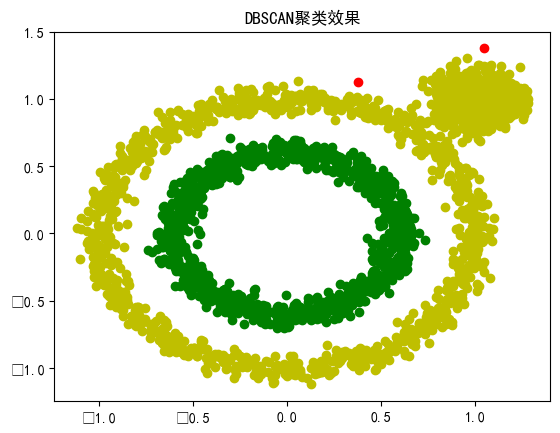

In [31]:
# 3.可视化
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('DBSCAN聚类效果')
plt.scatter(x[pre==0,0],x[pre==0,1],c='y')
plt.scatter(x[pre==1,0],x[pre==1,1],c='green')
plt.scatter(x[pre==-1,0],x[pre==-1,1],c='red')

plt.show()

### 五、层次聚类
        层次聚类法（Hierarchical Clustering Method）又称系统聚类法，它试图在不同层次上对样本集进行划分，进而达到形成树形的聚类结构。

样本集的划分方法：
- 聚集系统法
- 分割系统法
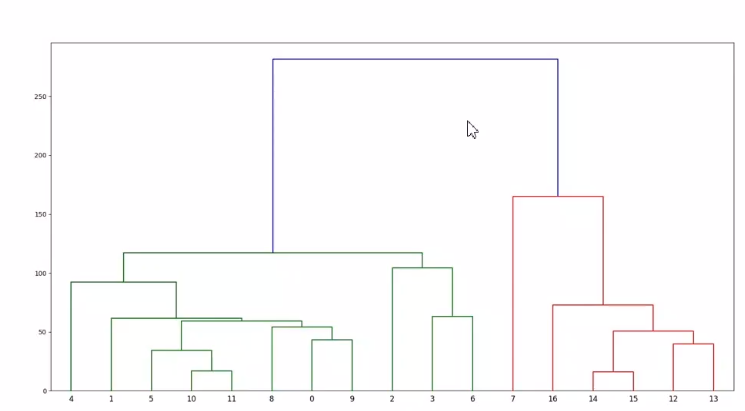

 在运用层次聚类法时，需要对类与类之间的距离做出规定，按照规定的不同，形成了基于最短距离、最长距离和评价距离的层次聚类法。对于给定的聚类簇 ,计算距离的公式为：
 - 最短距离：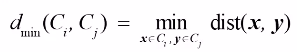
 - 最长距离：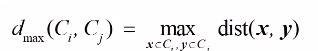
 - 平均距离：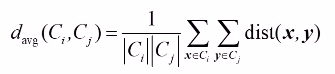


#### 1.基于聚集系统法具体步骤如下：
（1）输入样本集合、对聚类簇函数做出规定，给出聚类的簇数。    
（2）将每个样本点作为单独的一簇。    
（3）计算任何两个簇之间的距离。     
（4）按照距离最近原则合并簇。    
（5）若当前聚类簇数未达到规定的聚类簇数，则返回步骤（3），否则聚类结束。    
（6）输出聚类结果。    

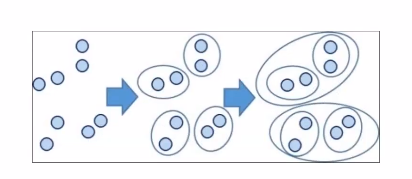

#### 2.具体实现
        使用skikit-learn库中cluster模块的AgglomerativeClustering类可以实现层次聚类算法对数据进行聚类，AgglomerativeClustering类的基本使用格式和常用参数说明如下：
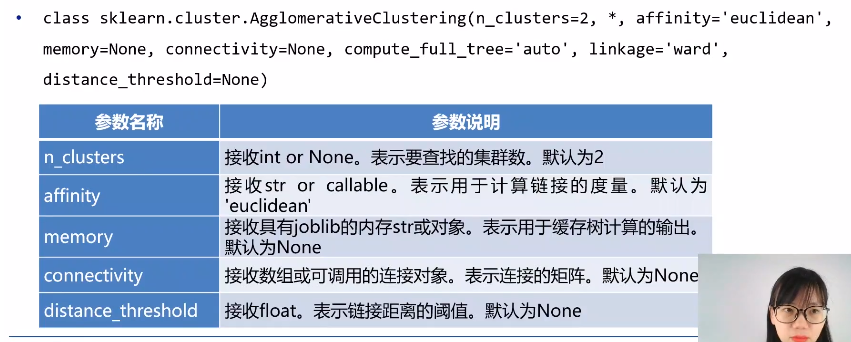

#### 代码

In [34]:
# 1.加载数据
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x=cancer['data']# 属性
y=cancer['target']# 标签

In [35]:
# 2.构建模型
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3).fit(x)# 模型训练

In [38]:
# 模型预测
pre=model.fit_predict(x)

In [40]:
# 3.模型评估
from sklearn.metrics import fowlkes_mallows_score,davies_bouldin_score
print(f'FM系数：{fowlkes_mallows_score(y,pre)}')
print(f'DB指数：{davies_bouldin_score(x,pre)}')
      

FM系数：0.6714341387693585
DB指数：0.6314289134608408


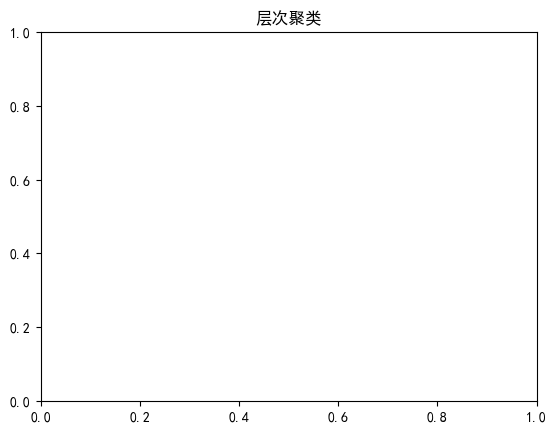

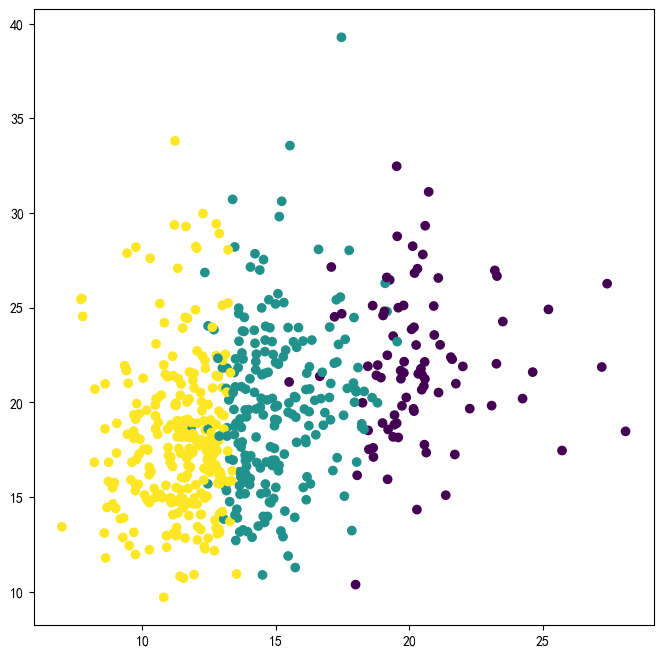

In [43]:
# 4.可视化展示层次聚类的效果
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('层次聚类')
plt.figure(figsize=(8,8))
plt.scatter(x[:,0],x[:,1],c=pre)
plt.show()